In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [39]:
data = pd.read_csv('resources/3.01. Country clusters.csv')

In [40]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


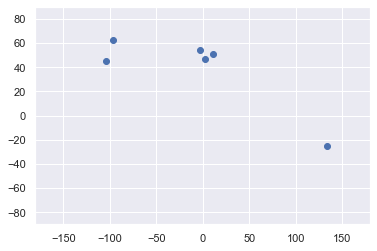

In [41]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [42]:
x = data.iloc[:,1:3]

In [43]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [44]:
kmeans = KMeans(3)

In [45]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [46]:
identified_clusters= kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [47]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] =  identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


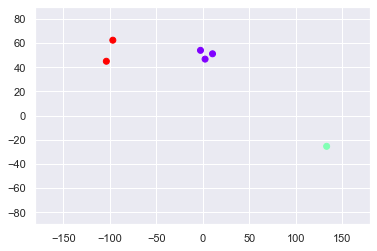

In [48]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [49]:
#Clustering categorical data
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [50]:
x = data_mapped.iloc[:,1:4]

In [51]:
kmeans = KMeans(2)

In [52]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [53]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [54]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] =  identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


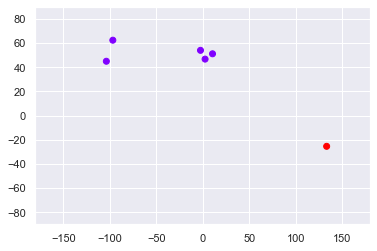

In [56]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [57]:
kmeans.inertia_

13208.958119999996

In [58]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [59]:
wcss # shows many clusters information

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

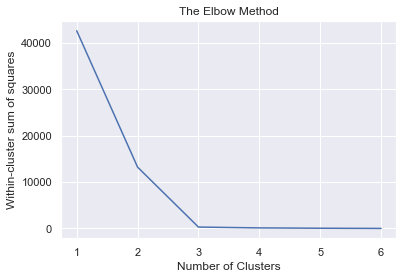

In [60]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()
